In [ ]:
# 1. Import Library Dulu

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# RandomForestClassifier, LogisticRegression, KNeighborsClassifier, SVC → Model yang akan kita pakai sebagai base models dan meta model.

In [2]:
# 2. Siapkan Dataset

from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset jadi training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# 3. Definisikan Base Models (Level-0)

# Kita pakai 3 model untuk base models:
# Random Forest
# KNN
# SVM

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svm', SVC(probability=True, kernel='linear'))
]

# 🛠 Penjelasan:
# RandomForestClassifier → Model berbasis pohon.
# KNeighborsClassifier → Model berbasis tetangga terdekat.
# SVC (Support Vector Classifier) → Model berbasis hyperplane.
# probability=True di SVM → Supaya bisa menghasilkan probabilitas untuk meta model.

In [ ]:
# 4. Definisikan Meta Model (Level-1)

# Meta model kita pakai Logistic Regression, karena cukup simpel dan kuat untuk gabungin hasil base models.
meta_model = LogisticRegression()
# Logistic Regression Itu Klasifikasi, Bukan Regresi Biasa!

# 📌 Kenapa pakai Logistic Regression?
# Simpel dan cepat.
# Cocok buat meta model karena bisa belajar pola dari base models tanpa overfit.

In [7]:
# 5. Buat Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, passthrough=False)
# passthrough=False → Meta model hanya belajar dari output base models, bukan fitur aslinya.

In [9]:
# 6. Train & Evaluasi Model

# Train model
stacking_clf.fit(X_train, y_train)

# Prediksi
y_pred = stacking_clf.predict(X_test)

# Cek akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


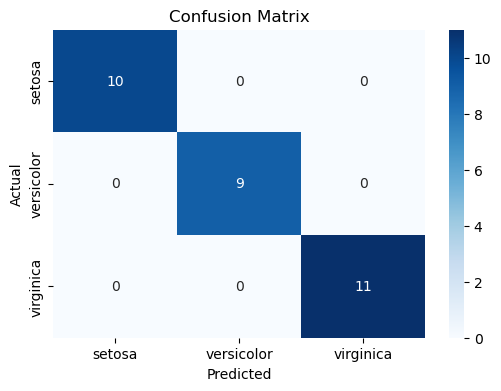


               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# Confusion Matrix dan Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Tampilkan classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print('\n', report)

